# Explarotary Data Analysis

In [3]:
#import required packages
import pandas as pd
import numpy as np
import holidays
from geopy import distance
import sys
sys.path.insert(0,'../scripts/')
from data_fetch import get_data

In [4]:
driver_location_data = get_data('data/driver_locations_during_request.csv','C:/Users/User/Desktop/Causal-Inference','driver_locations_during_request_v1')
nb_data = get_data('data/nb.csv','C:/Users/User/Desktop/Causal-Inference','nb_v1')

From the results we can see that there are 536020 and 1557740 rows for the completed orders and delivery requests by clients’ data respectively. The columns for each tables are as follows: order_id, driver_id, driver_action, lat, lng, created_at, updated_at, Trip ID, Trip Origin, Trip Destination, Trip Start Time, Trip End Time. 

In [24]:

nb_data.shape[0]

536020

In [25]:
driver_location_data.shape[0]

1557740

In [ ]:
driver_location_data.head()

In [ ]:
nb_data.head()

Basic information about completed orders and delivery requests by clients’ data, which gives us information about the dataset as shown below the dataset contains four columns with float64 data type, four int64 and five object data type in total.

In [6]:
driver_location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB


In [7]:
nb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


Null values found in our datasets can be seen below. 

In [10]:
driver_location_data.isna().sum()

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64

In [11]:
nb_data.isna().sum()

Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time     1651
Trip End Time          1
dtype: int64

In [12]:
driver_location_data.columns

Index(['id', 'order_id', 'driver_id', 'driver_action', 'lat', 'lng',
       'created_at', 'updated_at'],
      dtype='object')

In [13]:
nb_data.columns

Index(['Trip ID', 'Trip Origin', 'Trip Destination', 'Trip Start Time',
       'Trip End Time'],
      dtype='object')

By grouping our data by the driver id we can aggregate the number of pilots with the highest requests.

In [111]:
driver_location_data.groupby('driver_id')[['id','order_id','driver_action']].count()

,id,order_id,driver_action
driver_id,,,
121981,2149,2149,2149
171091,2715,2715,2715
171092,3630,3630,3630
171098,1257,1257,1257
171101,489,489,489
...,...,...,...
247508,1,1,1
247709,2,2,2
247794,1,1,1


<AxesSubplot:ylabel='Frequency'>

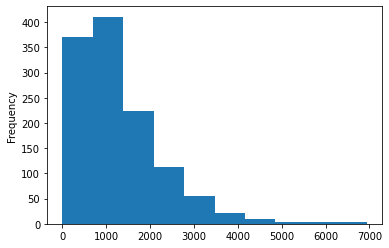

In [28]:
driver_location_data.groupby('driver_id')['driver_id'].count().plot.hist(bins=10)

Unique driver id count

In [108]:
driver_location_data['driver_id'].value_counts().unique

<bound method Series.unique of 245538    6941
243020    6447
242971    6258
243676    5884
243932    5793
          ... 
245840       1
247182       1
245907       1
246082       1
246602       1
Name: driver_id, Length: 1213, dtype: int64>

Unique trip id count

In [18]:
nb_data['Trip ID'].value_counts().unique

<bound method Series.unique of 391996     1
1180070    1
1180061    1
1180060    1
1180059    1
          ..
789757     1
789755     1
789751     1
789750     1
1637709    1
Name: Trip ID, Length: 536020, dtype: int64>

From the number of driver actions we can see that there is a significantly higher number of rejections by the pilots as seen in the images below.

In [6]:
driver_location_data.driver_action.value_counts()

rejected    1531837
accepted      25903
Name: driver_action, dtype: int64

<AxesSubplot:>

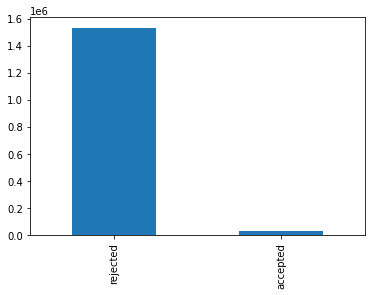

In [73]:
driver_location_data.driver_action.value_counts().plot(kind='bar')

In [ ]:
driver_location_data.drop(columns=['created_at','updated_at'])

In [7]:
nb_data['Trip Start Time']=pd.to_datetime(nb_data['Trip Start Time'])
nb_data['Trip End Time']=pd.to_datetime(nb_data['Trip End Time'])

In [8]:
nb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Trip ID           536020 non-null  int64         
 1   Trip Origin       536020 non-null  object        
 2   Trip Destination  536020 non-null  object        
 3   Trip Start Time   534369 non-null  datetime64[ns]
 4   Trip End Time     536019 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 20.4+ MB


The durations of the trips for each requests can be seen in the aggrated data below.

In [9]:
nb_data['duration']= (nb_data['Trip End Time'] - nb_data['Trip Start Time']).astype('timedelta64[m]')

<AxesSubplot:ylabel='Frequency'>

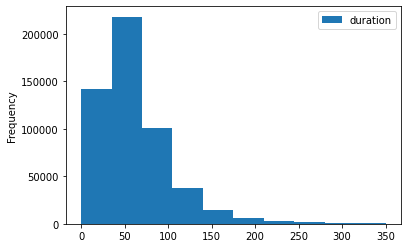

In [72]:
nb_data[["duration"]].plot.hist(bins=10, range=(0,350))

The distance between the trip origin and the trip destination can be seen in the data below.

In [33]:
nb_data['Trip_Origin_lat'] = nb_data['Trip Origin'].apply(lambda x:x.split(',')[0])
nb_data['Trip_Origin_long'] = nb_data['Trip Origin'].apply(lambda x:x.split(',')[1])
nb_data['Trip_Destination_lat'] =  nb_data['Trip Destination'].apply(lambda x:x.split(',')[0])
nb_data['Trip_Destination_long'] = nb_data['Trip Destination'].apply(lambda x:x.split(',')[1])

In [44]:
nb_data['distance']=nb_data.apply(lambda x:distance.distance((x['Trip_Origin_lat'],x['Trip_Origin_long']), (x['Trip_Destination_lat'],x['Trip_Destination_long'])).km,axis=1)

In [107]:
nb_data[["distance",'Trip ID']]

,distance,Trip ID
0,16.123451,391996
1,1.884305,391997
2,13.822393,391998
3,1.511034,391999
4,20.984319,392001
...,...,...
536015,1.254752,1637696
536016,9.124781,1637702
536017,2.733704,1637704
536018,6.504796,1637705


In [106]:
nb_data['distance'].sort_values(ascending=False)

26281     680.080847
276145    678.407303
60141     678.185547
106384    677.355600
278049    676.750048
             ...    
480721      0.000000
473311      0.000000
473315      0.000000
473319      0.000000
489301      0.000000
Name: distance, Length: 536020, dtype: float64

The number of requests made during a holiday in Nigeria is 9080 while the overwhelming majority of requests 526940 were made during non-holiday season.

In [67]:
nigeria_holiday= holidays.Nigeria()

In [68]:
nb_data["holiday"]=nb_data['Trip Start Time'].apply(lambda x:x in nigeria_holiday)

In [70]:
nb_data.holiday.value_counts()

False    526940
True       9080
Name: holiday, dtype: int64

In [74]:
merged_data =driver_location_data.merge(nb_data, how='inner', left_on='order_id',right_on="Trip ID")

In [79]:
merged_data.drop(columns=['created_at','updated_at'],inplace=True)

The pilot’s distance from the trip origin can be seen in the aggregated data below.

In [77]:
merged_data['pilot_distance'] = merged_data.apply(lambda x:distance.distance((x['Trip_Origin_lat'],x['Trip_Origin_long']), (x['lat'],x['lng'])).km,axis=1)

In [81]:
merged_data.drop(columns=['Trip_Origin_lang','Trip_Destination_lang'],inplace=True)

In [104]:
merged_data[["distance",'Trip ID','duration','pilot_distance']]

,distance,Trip ID,duration,pilot_distance
0,20.984319,392001,3.0,0.694264
1,20.984319,392001,3.0,1.551694
2,20.984319,392001,3.0,0.786777
3,20.984319,392001,3.0,0.692054
4,20.984319,392001,3.0,1.621848
...,...,...,...,...
1557735,8.112927,517948,102.0,3.263377
1557736,8.112927,517948,102.0,3.399641
1557737,8.112927,517948,102.0,3.002545
1557738,8.112927,517948,102.0,3.263377


In [83]:
merged_data.to_csv("../data/merged_data.csv",index=False)

There are 3574 requests accepted by pilots within a 500 meter range of the trip origin. While 119041 requests were rejected by pilots within a 500 meter range of the trip origin.

In [109]:
merged_data[(merged_data["pilot_distance"]<=0.5) & (merged_data["driver_action"]=="accepted")].shape[0]

3574

In [110]:
merged_data[(merged_data["pilot_distance"]<=0.5) & (merged_data["driver_action"]=="rejected")].shape[0]

119041

On the other hand there are 22329 requests accepted by pilots that are more than 500 meter away from a trip origin and 1412796 requests were rejected by pilots that are more than 500 meter away from a trip origin.

In [102]:
merged_data[(merged_data["pilot_distance"]>0.5) & (merged_data["driver_action"]=="accepted")].shape[0]

22329

In [103]:
merged_data[(merged_data["pilot_distance"]>0.5) & (merged_data["driver_action"]=="rejected")].shape[0]

1412796